Problem Statement:

We'll use this dataset to classify flowers into one of three species: Setosa, Versicolor, or Virginica, based on the measurements of the flowers.

Steps:


Load the Iris dataset.
Preprocess the data: Split it into training and testing sets.
Build and train a neural network model for classification.
Evaluate the model's performance.
Visualize the training and validation metrics.

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [2]:
iris = load_iris()

In [3]:
x = iris.data    # Features (sepal length, sepal width, petal length, petal width)
y = iris.target  # Labels (species)

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [5]:
x.shape

(150, 4)

In [6]:
y_train

array([0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2,
       1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2,
       1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1,
       0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2,
       1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2,
       1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

In [7]:
scalar = StandardScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

In [8]:
# Encode the labels (one-hot encoding)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=3)

In [9]:
y_train

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1

In [10]:
# Build the model

model = models.Sequential(
    [
        layers.Dense(64, activation = 'relu', input_shape = (x_train.shape[1], )),
        layers.Dense(32, activation = 'relu'),
        layers.Dense(3, activation = 'softmax')   # 3 classes for the species
    ]
)



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
#Compile the model

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [12]:
# Train the model

history = model.fit(x_train, y_train, epochs = 100, batch_size = 8, validation_split = 0.2)


Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.5012 - loss: 1.0495 - val_accuracy: 0.9167 - val_loss: 0.8687
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7585 - loss: 0.8194 - val_accuracy: 0.8333 - val_loss: 0.7056
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7581 - loss: 0.6401 - val_accuracy: 0.8333 - val_loss: 0.5822
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7858 - loss: 0.5801 - val_accuracy: 0.8750 - val_loss: 0.4988
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7354 - loss: 0.5391 - val_accuracy: 0.8750 - val_loss: 0.4475
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7922 - loss: 0.4611 - val_accuracy: 0.8750 - val_loss: 0.4117
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8395 - loss: 0.3844 - val_accuracy: 0.9167 - val_loss: 0.3828
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8072 - loss: 0.3731 - val_accuracy: 0.91

In [13]:
# Evaluate the model

test_loss, test_accuracy = model.evaluate(x_test, y_test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - accuracy: 1.0000 - loss: 0.0196


In [14]:
test_loss, test_accuracy = model.evaluate(x_train, y_train)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9881 - loss: 0.0539 


In [20]:
# Single prediction for the first test sample
import numpy as np
single_sample = np.expand_dims(x_test[0], axis=0)  # Expand dimensions to match batch format
prediction = model.predict(single_sample)
predicted_class = np.argmax(prediction)  # Get the predicted class
print(f"Predicted Class: {predicted_class}")
print(f"Actual Class: {np.argmax(y_test[0])}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
Predicted Class: 1
Actual Class: 1


In [21]:
# Batch prediction for all test samples
batch_predictions = model.predict(x_test)
predicted_classes = np.argmax(batch_predictions, axis=1)  # Convert probabilities to class indices
actual_classes = np.argmax(y_test, axis=1)
print(f"Predicted Classes: {predicted_classes}")
print(f"Actual Classes: {actual_classes}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
Predicted Classes: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
Actual Classes: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


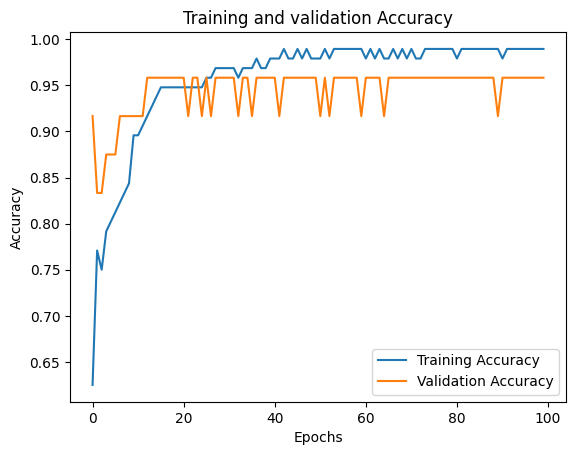

In [15]:
# plot training and validation accuracy

plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.title('Training and validation Accuracy')
plt.legend()
plt.show()

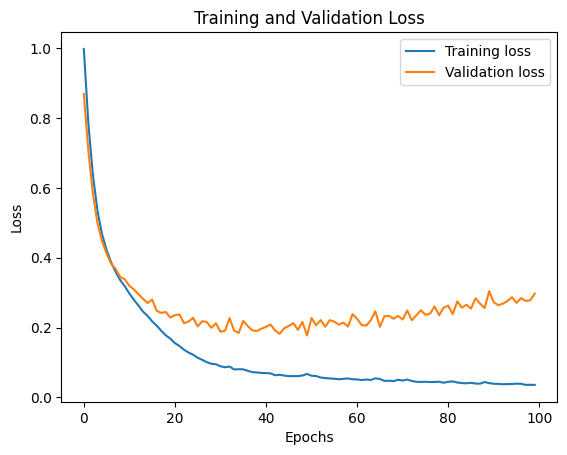

In [16]:
# Plot training and validation loss

plt.plot(history.history['loss'], label = 'Training loss')
plt.plot(history.history['val_loss'], label = 'Validation loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.title('Training and Validation Loss')

plt.legend()
plt.show()

In [17]:
What are Training Loss and Validation Loss?
Training Loss:

Measures how well the model is performing on the training dataset during training.
A lower training loss means the model is improving and learning from the training data.
Validation Loss:

Measures how well the model is performing on the validation dataset, which is a separate dataset the model hasn't seen during training.
A lower validation loss means the model is generalizing well to unseen data.
Key Observations from the Graph:
Initial High Loss:

At the beginning (Epoch 0), both training loss and validation loss are high. This is normal because the model hasn't learned much yet.
Loss Decreases:

As training progresses, both the training loss (blue line) and validation loss (orange line) start decreasing. This shows the model is learning patterns from the data.
Training Loss Keeps Improving:

The blue line continues to decrease steadily, meaning the model is performing better and better on the training data.
Validation Loss Stops Improving:

Initially, the orange line (validation loss) decreases along with the training loss, showing the model is also improving on the validation data.
Validation Loss Increases Slightly After Some Point:

Around 20-30 epochs, the orange line (validation loss) starts to increase or fluctuate while the blue line (training loss) continues to decrease.
This is a sign of overfitting, where the model is memorizing the training data instead of generalizing to new, unseen data.
Why Does This Happen?
Overfitting:
The model becomes too specialized in the training data and struggles to perform well on the validation dataset.
After a certain point, the model's ability to generalize decreases.
How to Interpret This Graph?
Good Part:

Up to around 20 epochs, both training and validation loss decrease steadily, indicating the model is learning well.
Overfitting Part:

After 20-30 epochs, the gap between training loss and validation loss widens.
The validation loss increases while the training loss decreases, showing the model is overfitting.
What Can You Do to Prevent Overfitting?
Early Stopping:

Stop training when the validation loss stops improving (e.g., around 20 epochs in this case).
Regularization:

Add techniques like Dropout layers or L2 regularization to the model to reduce overfitting.
More Data:

Increase the size of your training dataset if possible.
Reduce Complexity:

Use a simpler model (fewer layers or parameters) to avoid overfitting.
Conclusion:
The graph shows a typical training process where the model learns initially but starts overfitting after a certain point.
To improve, you should stop training when validation loss starts increasing (around 20 epochs).



SyntaxError: unterminated string literal (detected at line 8) (<ipython-input-17-19b1c9ceeff2>, line 8)